In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tqdm import tqdm
from colour import wavelength_to_XYZ

In [2]:
from chromalab.observer import Observer, Cone, getsRGBfromWavelength, transformToDisplayChromaticity, getHeringMatrix
from chromalab.spectra import Spectra, Illuminant
from chromalab.maxbasis import MaxBasis
from chromalab.maxdisplaybasis import *
from chromalab.visualizer import PSWrapper, DisplayBasisType, exportAndPlay, easeFunction
from chromalab.animation import Animation

objc[36286]: Class GLFWApplicationDelegate is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2ba386e28) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/polyscope_bindings.cpython-311-darwin.so (0x2d89f66f0). One of the two will be used. Which one is undefined.
objc[36286]: Class GLFWWindowDelegate is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2ba386db0) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/polyscope_bindings.cpython-311-darwin.so (0x2d89f6718). One of the two will be used. Which one is undefined.
objc[36286]: Class GLFWContentView is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2ba386e50) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

## Create the Cone Fundamentals in 4D

In [4]:
wavelengths = np.arange(400, 700, 5)
d65 = Illuminant.get("D65")
leds = [660, 550, 451, 590, 510, 410]

In [5]:
tetrachromat = Observer.tetrachromat(wavelengths=wavelengths, verbose=True) 
maxbasis = MaxBasis(tetrachromat, verbose=True)
# viz = PSWrapper(tetrachromat, maxbasis, itemsToDisplay=PSWrapper.ItemsToDisplay.BOTH, displayBasis=DisplayBasisType.MAXBASIS, verbose=True) 
 
cones = [Cone.cone(x, wavelengths=wavelengths, template="neitz", od=0.35) for x in [450, 500, 550, 600]]
ideal_tetrachromat = Observer(cones, illuminant=d65, verbose=True)
max_basis_ideal_tet = MaxBasis(ideal_tetrachromat, verbose=True)

trichromat = Observer.trichromat(wavelengths=wavelengths) 
maxbasis_tri = MaxBasis(trichromat, verbose=True)
# # viz_tri = PSWrapper(trichromat, maxbasis_tri, itemsToDisplay=PSWrapper.ItemsToDisplay.MESH, displayBasis=DisplayBasisType.MAXBASIS, verbose=True)


100%|██████████| 57/57 [00:00<00:00, 649.77it/s]


In [6]:
# mdb = TriDisplayGamut(trichromat, chromaticity_diagram_type=ChromaticityDiagramType.ConeBasis)
# mdb.computeMaxPrimariesInChrom()
# mdb.displayPrimariesInChromDiagram(title="Ideal Hull with 3 Primaries")

(60, 2)
Volume Ratio Between n primaries / ideal = 0.9332563743800996


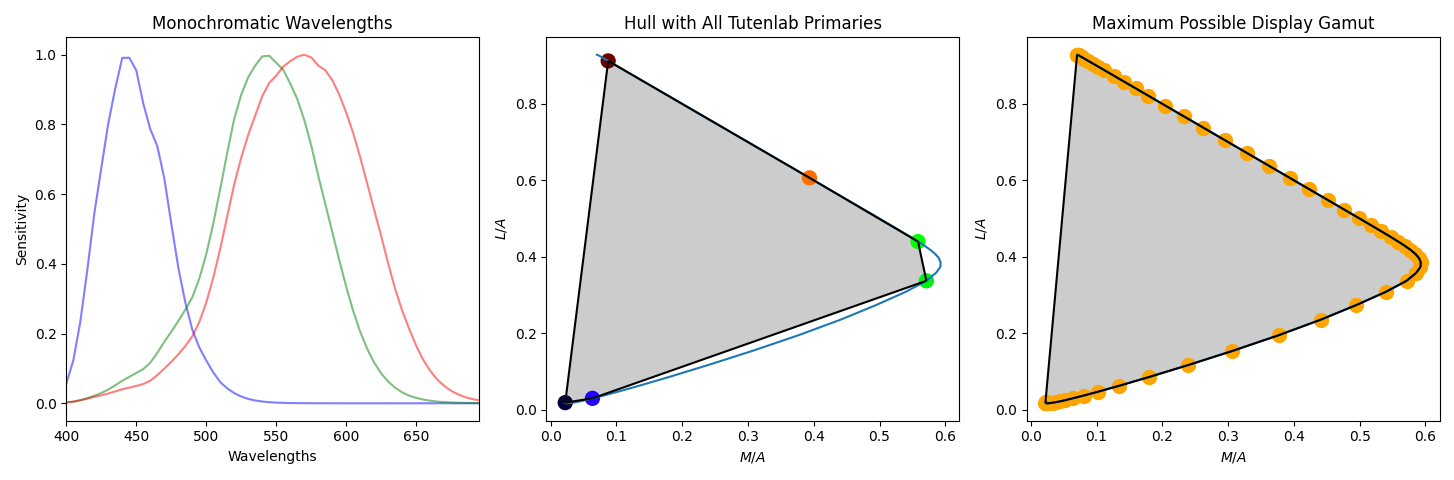

In [7]:
mdb1 = TriDisplayGamut(trichromat, chromaticity_diagram_type=ChromaticityDiagramType.ConeBasis)
mdb1.setMonochromaticPrimaries(np.array([leds[i] for i in [2, 1, 3, 0, 4, 5]]))
mdb1.displayPrimariesInChromDiagram(title="Hull with All Tutenlab Primaries")

Max Primaries -- (415, 520, 595, 660)
Max Volume = 0.0008207534300376354
Volume Ratio Between n primaries / ideal = 0.45105945134964576


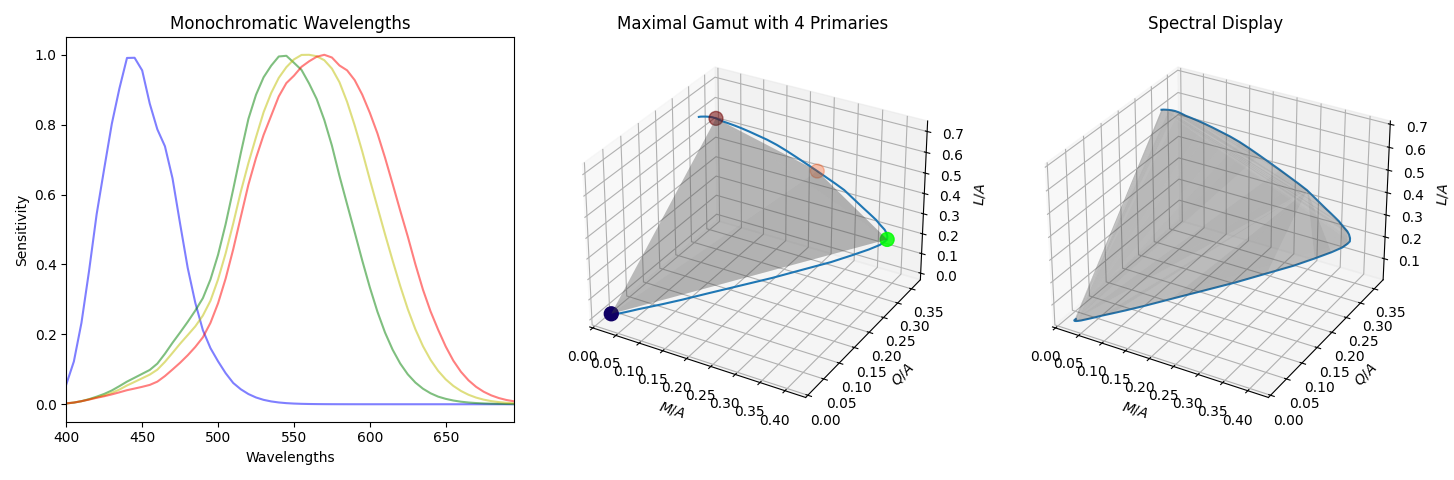

In [ ]:
mdb1 = TetraDisplayGamut(tetrachromat, chromaticity_diagram_type=ChromaticityDiagramType.ConeBasis)
mdb1.computeMaxPrimariesInChrom(wavelengths=np.arange(410, 665, 5))
mdb1.displayPrimariesInChromDiagram(title="Maximal Gamut with 4 Primaries")

Volume Ratio Between n primaries / ideal = 0.41780425851299924


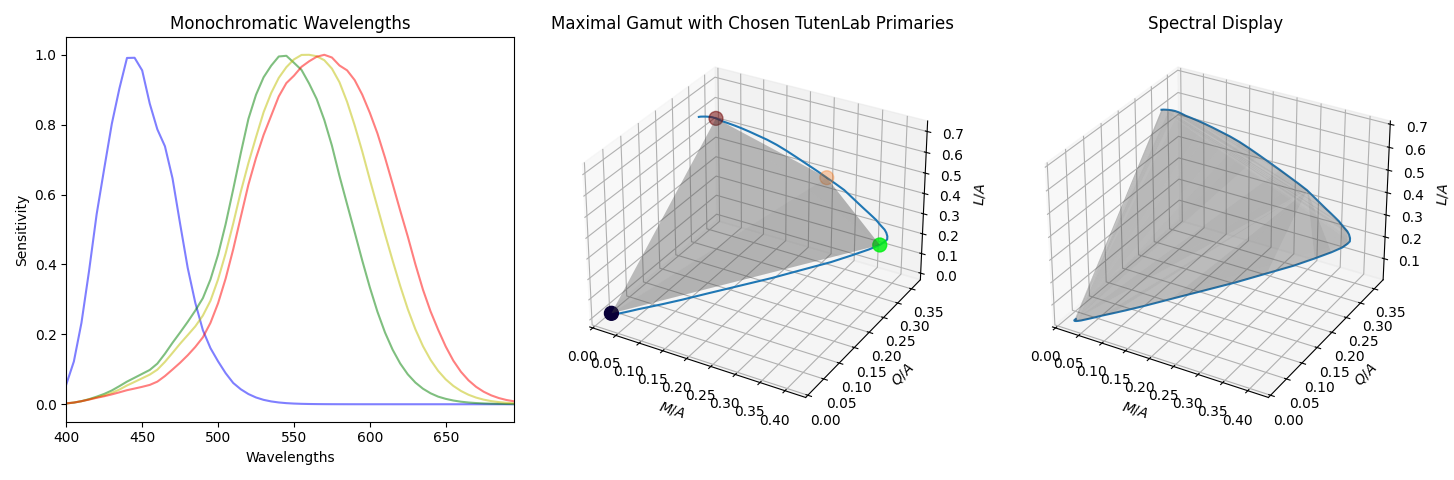

In [10]:
mdb2 = TetraDisplayGamut(tetrachromat, chromaticity_diagram_type=ChromaticityDiagramType.ConeBasis)
mdb2.setMonochromaticPrimaries([leds[i] for i in [5, 4, 3, 0]])
mdb2.displayPrimariesInChromDiagram(title="Maximal Gamut with Chosen TutenLab Primaries")

Volume Ratio Between n primaries / ideal = 0.4583213019051183


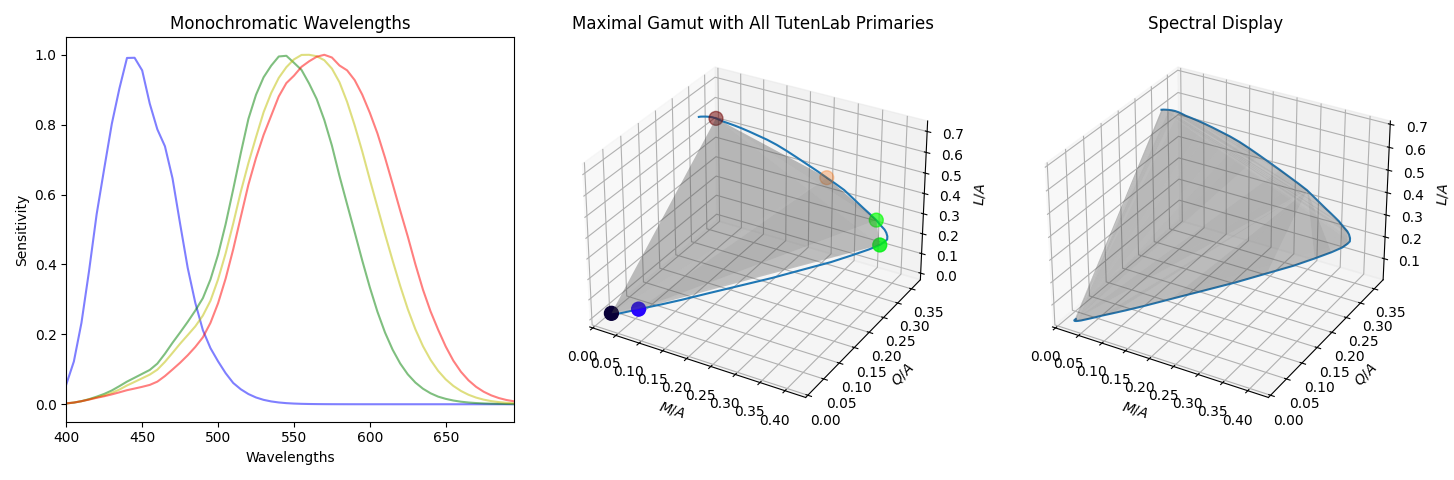

In [11]:
mdb3 = TetraDisplayGamut(tetrachromat, chromaticity_diagram_type=ChromaticityDiagramType.ConeBasis)
mdb3.setMonochromaticPrimaries([leds[i] for i in [5, 4, 3, 0, 1, 2]])
mdb3.displayPrimariesInChromDiagram(title="Maximal Gamut with All TutenLab Primaries")

Max Primaries -- (415.0, 525.0, 590.0, 695.0)
Max Volume = 0.005513140245647301
Volume Ratio Between n primaries / ideal = 0.6035499443726443


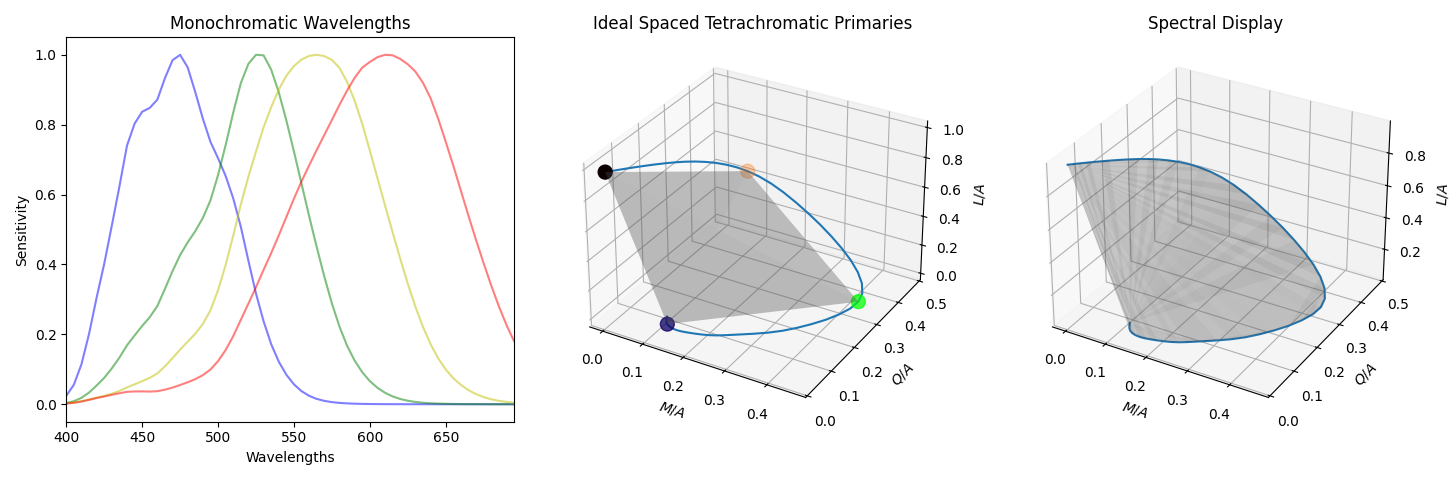

In [12]:
ideal_tet_mdb = TetraDisplayGamut(ideal_tetrachromat, chromaticity_diagram_type=ChromaticityDiagramType.ConeBasis)
ideal_tet_mdb.computeMaxPrimariesInChrom()
ideal_tet_mdb.displayPrimariesInChromDiagram(title="Ideal Spaced Tetrachromatic Primaries")